<p><b>Our goal is to predict a patient's insurance charges based on their characteristics!</b></p>

- Download the database file from the Kaggle page: https://www.kaggle.com/mirichoi0218/insurance
- Import the file 'insurance_exercice.csv' into the dataframe data <br><br>

<b>DATA CLEANING</b> <br>

Proceed with the following checks: 
- Are my columns in the correct format?
- Do my columns have missing values? If so, how to handle them? (additional information: a null value for children actually indicates that the person simply has no children)
- After my corrections, are there still missing values in my dataset?
- Are there any irrelevant columns for building a model?<br>

<b>MODEL CONSTRUCTION</b> <br>

- Use the 'random' library to create the dataframe dataR, which will be a randomly shuffled version of data
- Create the dataframes dataTrain and dataTests which will respectively contain the first 80% of the rows and the last 20% of the rows
- Using SKlearn, construct a univariate linear regression with Age as the training column and charges as the column to predict
- Place all the code created here in a function linearRegression which takes dataR as the dataframe, fit as the list of training columns, and toPredict as the label of the value to predict.
- Add the necessary code in your function to normalize the values of the numerical training columns.
- Test the function with the training columns Age and BMI
- Filter the numerical columns to keep in the model by analyzing the correlation coefficient between them and the charges
- Ensure that the training columns are not too similar (correlation matrix)
- Analyze the categorical columns and decide whether to use them in our model.
- In a graph, create a scatter plot with age on the x-axis, charges on the y-axis, and whether the person is a smoker or not in the color of the points.
- Add the necessary code to the function for transforming categorical variables (dummies)


In [81]:
# Import the file into the dataframe data

import pandas as pd
data = pd.read_csv('16 - insurance_exercice.csv')
data.head(10)


,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,NaN,yes,southwest,16884.92400
1,1,18,male,33.770,1.0,no,southeast,1725.55230
2,2,28,male,33.000,3.0,no,southeast,4449.46200
3,3,33,male,22.705,NaN,no,northwest,21984.47061
4,4,32,male,28.880,NaN,no,northwest,3866.85520
5,5,31,female,25.740,NaN,no,southeast,3756.62160
6,6,46,female,33.440,1.0,no,southeast,8240.58960
7,7,37,female,27.740,3.0,no,northwest,7281.50560
8,8,37,male,29.830,2.0,no,northeast,6406.41070
9,9,60,female,25.840,NaN,no,northwest,28923.13692


# Data cleaning

In [82]:
# Associate the column name with its type

d = {'colonne': list(data.columns), 'type': list(data.dtypes)}
colonnesTypes = pd.DataFrame(data=d)
colonnesTypes

,colonne,type
0,Unnamed: 0,int64
1,age,int64
2,sex,object
3,bmi,float64
4,children,float64
5,smoker,object
6,region,object
7,charges,float64


We do not encounter any format issues in this dataset. 2 columns have numerical values: bmi and children


In [83]:
# Missing values?

data_na = (data.isnull().sum()/len(data))*100
data_na

Unnamed: 0     0.000000
age            0.000000
sex            0.000000
bmi            1.718984
children      42.899851
smoker         0.000000
region         0.000000
charges        0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

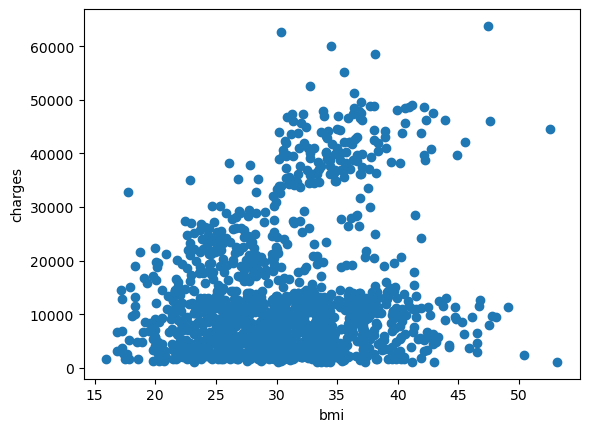

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax.scatter (x=data['bmi'], y=data['charges'])
plt.ylabel('charges')
plt.xlabel('bmi')
plt.show


We do not observe any outliers.
Therefore, we can fill in the missing values using the column's mean.

In [104]:
# The bmi column has less than 2% missing values so we can fill them with the mean
# We isolate the missing values and fill them with the column's mean

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

For the children column, according to the instructions, the absence of a value means that there are no children.
So, we can replace NaN with 0.

In [86]:
data['children'] = data['children'].fillna(0)

In [87]:
# Missing values?

data_na = (data.isnull().sum()/len(data))*100
data_na

Unnamed: 0    0.0
age           0.0
sex           0.0
bmi           0.0
children      0.0
smoker        0.0
region        0.0
charges       0.0
dtype: float64

Unnamed: 0 has no value for our model, we can delete the column.

In [88]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
5,31,female,25.740,0.0,no,southeast,3756.62160
6,46,female,33.440,1.0,no,southeast,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,northeast,6406.41070
9,60,female,25.840,0.0,no,northwest,28923.13692


# Model construction

In [89]:
# Use the 'random' library to create the dataframe dataR which will be a randomly shuffled version of data

import random
random.seed(1)

random_indices = random.sample(range(0, len(data)), k=len(data))
dataR = data.iloc[random_indices]
dataR.reset_index(inplace = True)
dataR.drop(['index'], axis=1, inplace=True)
dataR.head(10)

,age,sex,bmi,children,smoker,region,charges
0,47,female,26.600,2.0,no,northeast,9715.84100
1,35,female,26.125,0.0,no,northeast,5227.98875
2,38,male,34.700,2.0,no,southwest,6082.40500
3,51,female,33.915,0.0,no,northeast,9866.30485
4,33,female,22.135,1.0,no,northeast,5354.07465
5,38,female,27.600,0.0,no,southwest,5383.53600
6,62,female,25.000,0.0,no,southwest,13451.12200
7,44,male,25.365,1.0,no,northwest,7518.02535
8,45,male,39.805,0.0,no,northeast,7448.40395
9,27,female,30.400,3.0,no,northwest,18804.75240


In [90]:
# Create the dataframes dataTrain and dataTests which will respectively contain 80% of the rows and 20% of the rows
# 1070 first rows

cut = round(len(dataR)*0.8)
cut

1070

In [91]:
# Creating the dataset

dataTrain = dataR.iloc[0:cut, :]
dataTest = dataR.iloc[cut:, :]

<b> Create the first prediction model with univariate regression</b>

<function matplotlib.pyplot.show(close=None, block=None)>

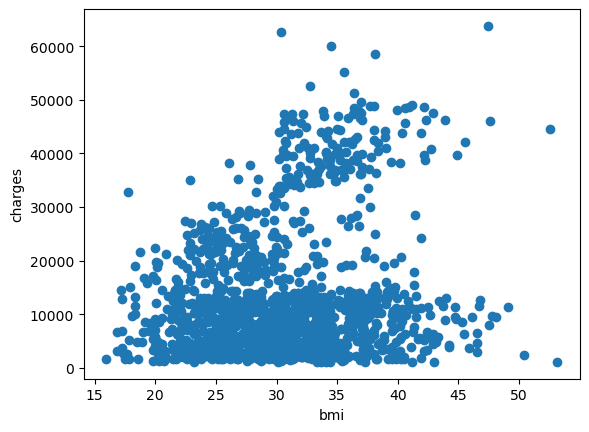

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(x= dataR['bmi'], y= dataR['charges'])
plt.ylabel('charges')
plt.xlabel('bmi')
plt.show

A fairly large volume of data is located at the bottom of the graph with a correlation

<function matplotlib.pyplot.show(close=None, block=None)>

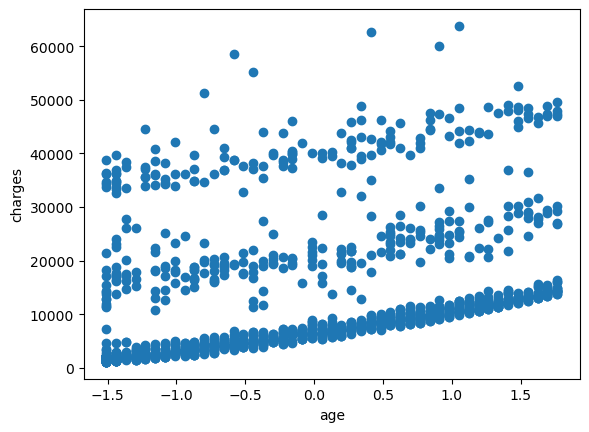

In [105]:
# Age as the training column and charges as the column to predict

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(x= dataR['age'], y= dataR['charges'])
plt.ylabel('charges')
plt.xlabel('age')
plt.show

The correlation with age is more pronounced, but there seem to be several distinct groups emerging... to analyze

In [94]:
# Creating our first prediction
# Using SKlearn, construct a univariate linear regression with Age as the training column and charges as the column to predict

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression() #on souhaite une régression linéaire

lr.fit(dataTrain[['age']],dataTrain['charges'])
prediction = lr.predict(dataTest[['age']])

rmse = mean_squared_error(prediction, dataTest['charges'])**(1/2)
rmse

12072.716130957291

In [95]:
# Automate the code by creating a linearRegression function


def linearRegression (dataR, fit, toPredict):
    
    cut = round(len(dataR)*0.8)
    dataTrain = dataR.iloc[0:cut, :]
    dataTest = dataR.iloc[cut:, :]
    
    lr = linear_model.LinearRegression()
    lr.fit(dataTrain[fit], dataTrain[toPredict])
    prediction = lr.predict(dataTest[fit])
    
    rmse = mean_squared_error(prediction, dataTest[toPredict])**(1/2)
    return rmse

linearRegression(dataR,['age'], 'charges')

12072.716130957291

# Standardization of values

In [96]:
# Add the necessary code in your function to normalize the values of the numerical training columns. Justify the choice of normalization method.
# Test your function with the training columns Age and BMI


from sklearn import preprocessing

def linearRegression (dataR, fit, toPredict):
    
    fullListNumbers = list(dataR.select_dtypes(include=['int64', 'float64']).columns)
    fullListNumbers = fullListNumbers[:-1] #on enlève la dernière colonne qui correspond aux 'charges' - on ne doit pas modifier 

    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(dataR[fullListNumbers])
    dfStand = pd.DataFrame(dfStand, columns = fullListNumbers)
    dataR[fullListNumbers] = dfStand
    
    cut = round(len(dataR)*0.8)
    dataTrain = dataR.iloc[0:cut, :]
    dataTest = dataR.iloc[cut:, :]
    
    lr = linear_model.LinearRegression()
    lr.fit(dataTrain[fit], dataTrain[toPredict])
    prediction = lr.predict(dataTest[fit])
    
    rmse = mean_squared_error(prediction, dataTest[toPredict])**(1/2)
    return rmse

linearRegression(dataR,['age', 'bmi'], 'charges') #on va pouvoir tester un modèle avec deux features: age et bmi

11904.385151365834

<function matplotlib.pyplot.show(close=None, block=None)>

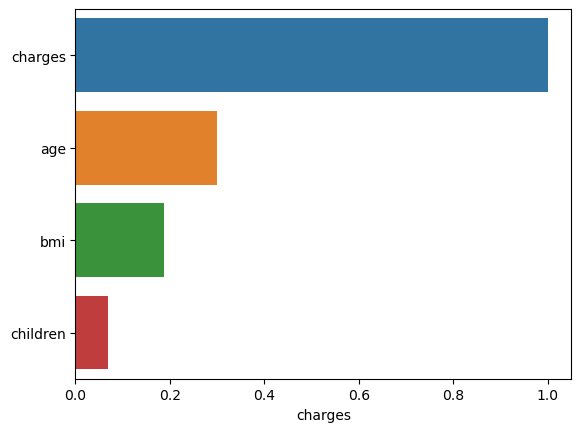

In [97]:
# Checking the correlation with charges for each feature.
# Filter the numerical columns to keep in the model by analyzing the correlation coefficient between them and the charges

import seaborn as sns

dataR[['bmi', 'children', 'charges', 'age']]
df_corr = dataR[['bmi', 'children', 'charges', 'age']].corr()
corrCharges = df_corr.sort_values('charges', ascending = False)

sns.barplot (x= corrCharges['charges'], y=corrCharges.index)
plt.show

We can set aside the number of children which has little correlation with charges.

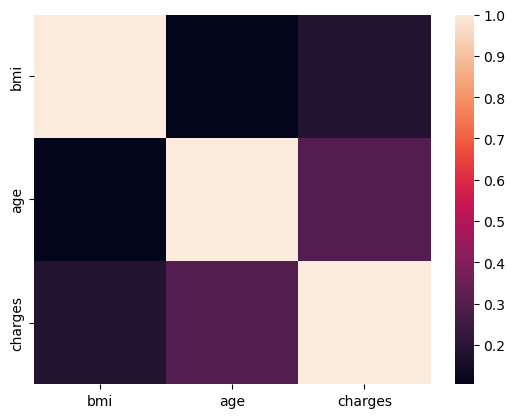

In [98]:
# Also check that the training columns are not too similar (correlation matrix)

df_corr = abs(dataR[['bmi', 'age', 'charges']].corr())
sns.heatmap(df_corr)

plt.show()

No problem of too strong correlation between 2 variables at a time, we can keep these 3 numerical values.

# Integration of categorical values

Smoker - nombre de categories : 2 - Pourcentage de la valeur 1: 0.7952167414050823


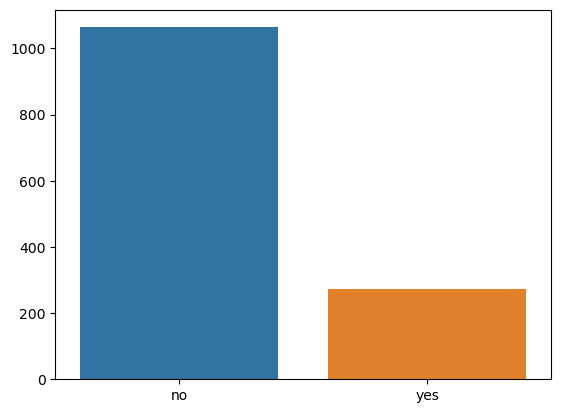

In [99]:
# Analyze the categorical columns and decide whether to use them in our model

test = dataR.groupby(dataR['smoker']).size().sort_values(ascending=False)

sns.barplot(x=list(test.index), y=list(test.iloc[0:]))

print('Smoker' + ' - nombre de categories : ' + str(len(test)) + ' - Pourcentage de la valeur 1: ' + str(test[0]/len(dataR)))

Region - nombre de categories : 4 - Pourcentage de la valeur 1: 0.27204783258594917


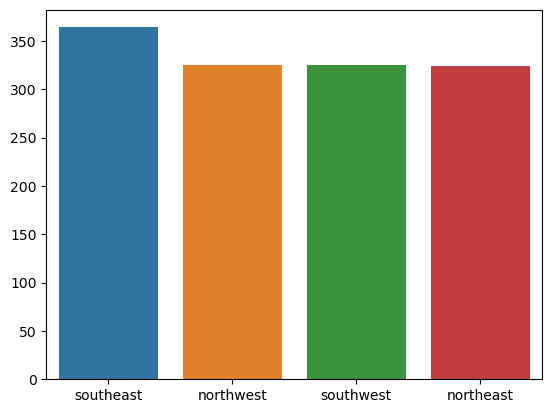

In [100]:
test = dataR.groupby(dataR['region']).size().sort_values(ascending=False)

sns.barplot(x=list(test.index), y=list(test.iloc[0:]))

print('Region' + ' - nombre de categories : ' + str(len(test)) + ' - Pourcentage de la valeur 1: ' + str(test[0]/len(dataR)))

No problem, both values are usable.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabed'

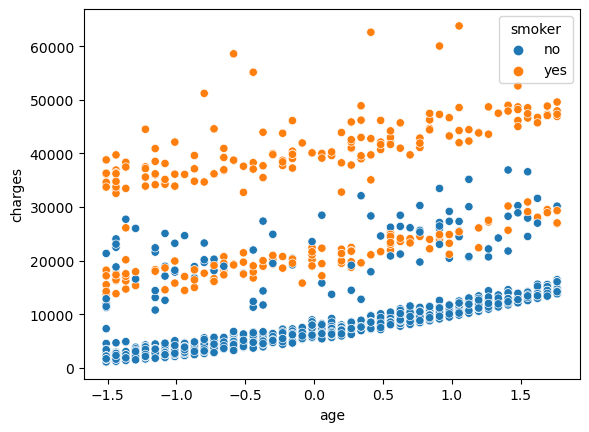

In [101]:
# In a graph, create a scatter plot with age on the x-axis, charges on the y-axis, and whether the person is a smoker or not in the color of the points.


fig, ax = plt.subplots()
sns.scatterplot(x=dataR['age'], y=dataR['charges'], hue=dataR['smoker'])
plt.ylabel('charges')
plt.xlabed('age')
plt.show

It seems that there is a very strong correlation between smoking and healthcare costs, regardless of age!

In [103]:
# Add the necessary code to your function for transforming categorical variables (dummies)


def linearRegression (dataR, fit, toPredict):
    
    fullListNumbers = list(dataR.select_dtypes(include=['int64', 'float64']).columns)
    fullListNumbers = fullListNumbers[:-1]

    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(dataR[fullListNumbers])
    dfStand = pd.DataFrame(dfStand, columns = fullListNumbers)
    dataR[fullListNumbers] = dfStand
    
    allcatColumns = list(dataR[fit].select_dtypes(include=['object']).columns)
    dummy_cols = pd.DataFrame()
    for col in allcatColumns:
        col_dummies = pd.get_dummies(dataR[col], prefix = str(col))
        dataR = pd.concat([dataR, col_dummies], axis=1)
        del dataR[col]
        fit = fit + list(col_dummies.columns)
        fit.remove(col)
    
    cut = round(len(dataR)*0.8)
    dataTrain = dataR.iloc[0:cut, :]
    dataTest = dataR.iloc[cut:, :]
    
    lr = linear_model.LinearRegression()
    lr.fit(dataTrain[fit], dataTrain[toPredict])
    prediction = lr.predict(dataTest[fit])
    
    rmse = mean_squared_error(prediction, dataTest[toPredict])**(1/2)
    return rmse

fit =['age', 'sex', 'bmi', 'smoker', 'region']
linearRegression(dataR, fit, 'charges')

5408.754815796692

We have halved the last RMSE. 
Therefore, the fact that the person is a smoker has helped reduce our error rate.